# <span style='color:red'> Support Vector Regressor Grad Admission Dataset </span>

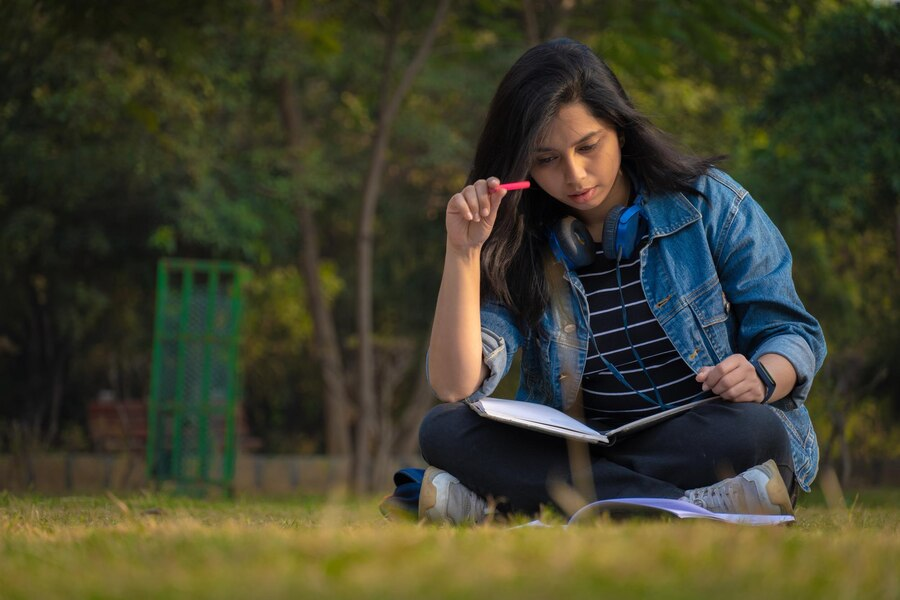

In [1]:
from IPython import display
display.Image('Desktop/Datasets/student.png')

# <span style='color:red'> 1.0 Importing required libraries </span>

In [30]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 502)
pd.set_option('display.max_rows', 502)
### To save the model
import pickle


# <span style='color:red'> 1.1 Importing Graduate Admission Dataset and doing statistical analysis </span>

In [31]:
dataset1=pd.read_csv('desktop/Datasets/Admission_Predict_Ver1.1.csv')
dataset1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
dataset1.drop('Serial No.',axis=1,inplace=True)
dataset1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [34]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [35]:
dataset1.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# <span style='color:red'> 1.2 Visualising Numerical data </span>

In [36]:
Numerical_features=dataset1.columns
print(Numerical_features)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [41]:
for feature in Numerical_features:
    print('feature {} has {} unique counts'.format((feature),dataset1[feature].nunique()))

feature GRE Score has 49 unique counts
feature TOEFL Score has 29 unique counts
feature University Rating has 5 unique counts
feature SOP has 9 unique counts
feature LOR  has 9 unique counts
feature CGPA has 184 unique counts
feature Research has 2 unique counts
feature Chance of Admit  has 61 unique counts


In [43]:
discrete_feature=[feature for feature in Numerical_features if dataset1[feature].nunique()<10]
print(discrete_feature)

['University Rating', 'SOP', 'LOR ', 'Research']


In [52]:
continuous_feature= [feature for feature in Numerical_features if feature not in discrete_feature]
print(continuous_feature)

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


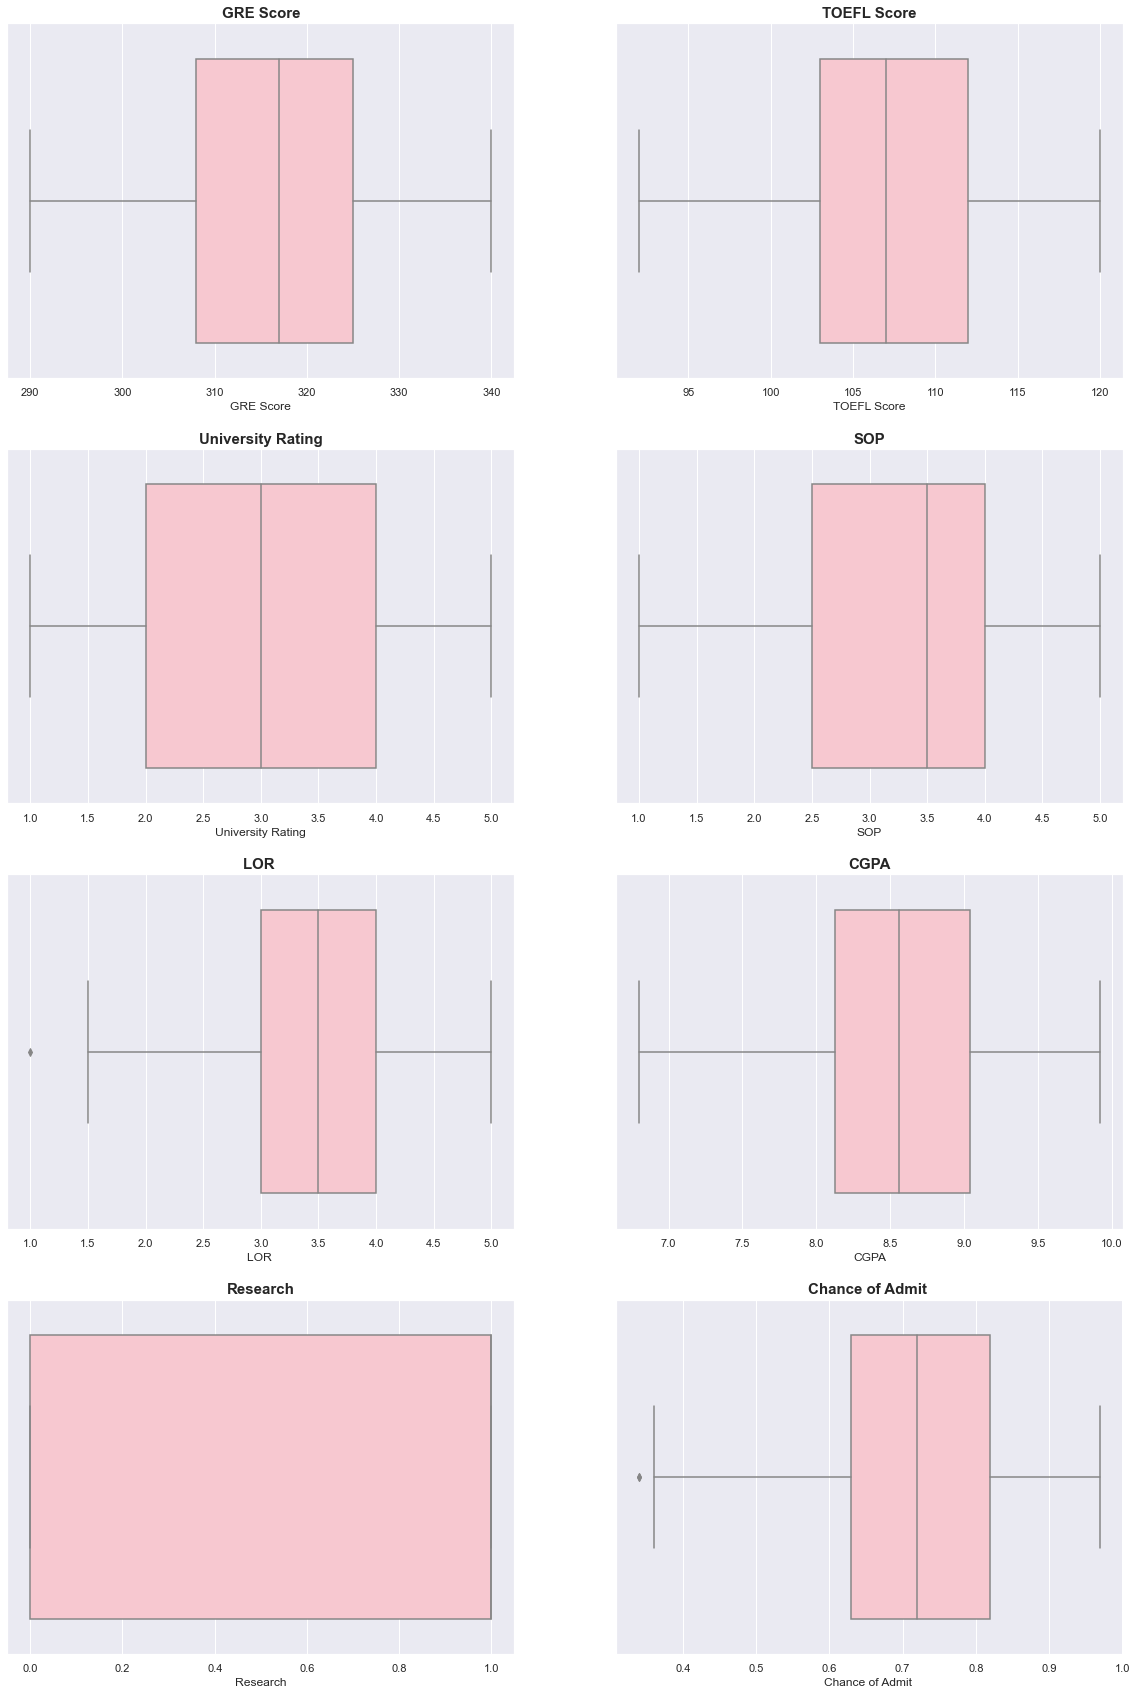

In [55]:
### Checking outliers in numerical features
plt.figure(figsize=(20,30))
for feature in enumerate(Numerical_features):
    plt.subplot(4,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.boxplot(data=dataset1,x=feature[1],color="pink")
    plt.title('{}'.format(feature[1]),fontsize=15,fontweight='bold')
    

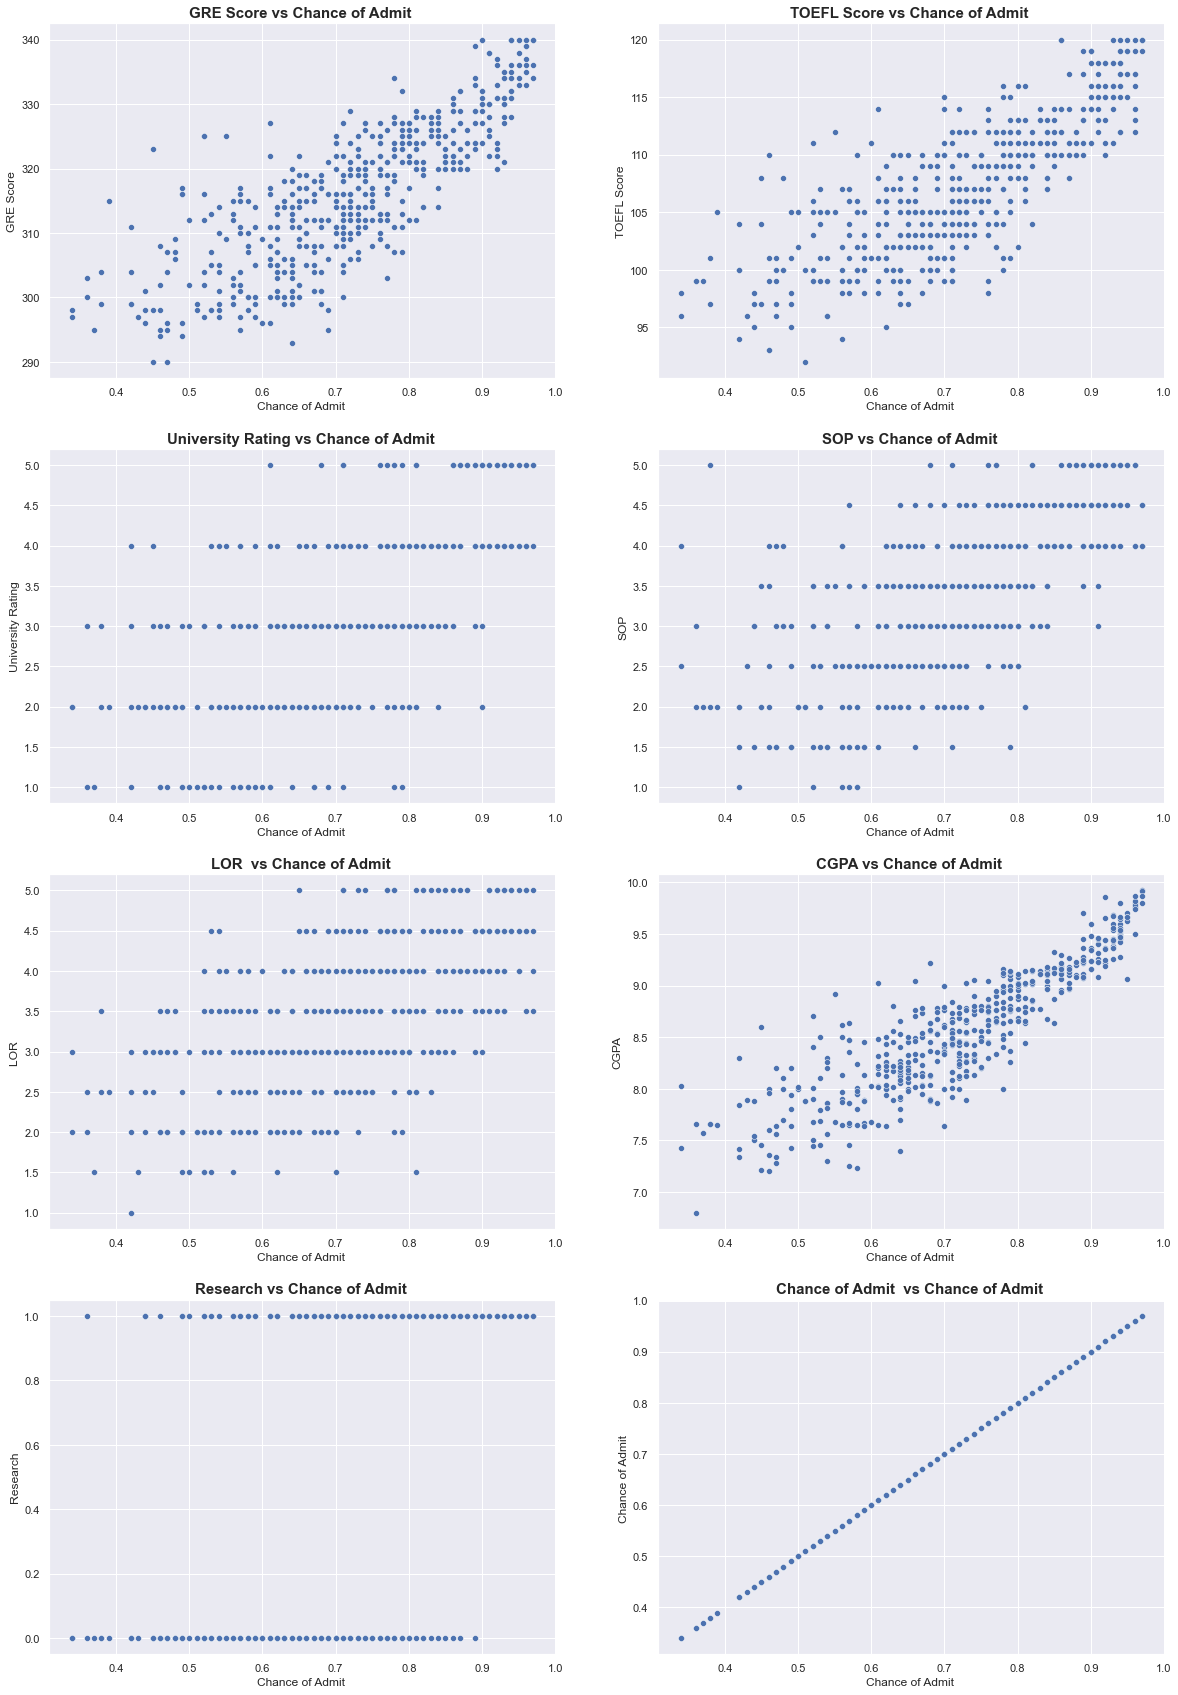

In [58]:
plt.figure(figsize=(20,30))
for feature in enumerate(Numerical_features):
    plt.subplot(4,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.scatterplot(data=dataset1,x='Chance of Admit ',y=feature[1])
    plt.title('{} vs Chance of Admit '.format(feature[1]),fontsize=15,fontweight='bold')

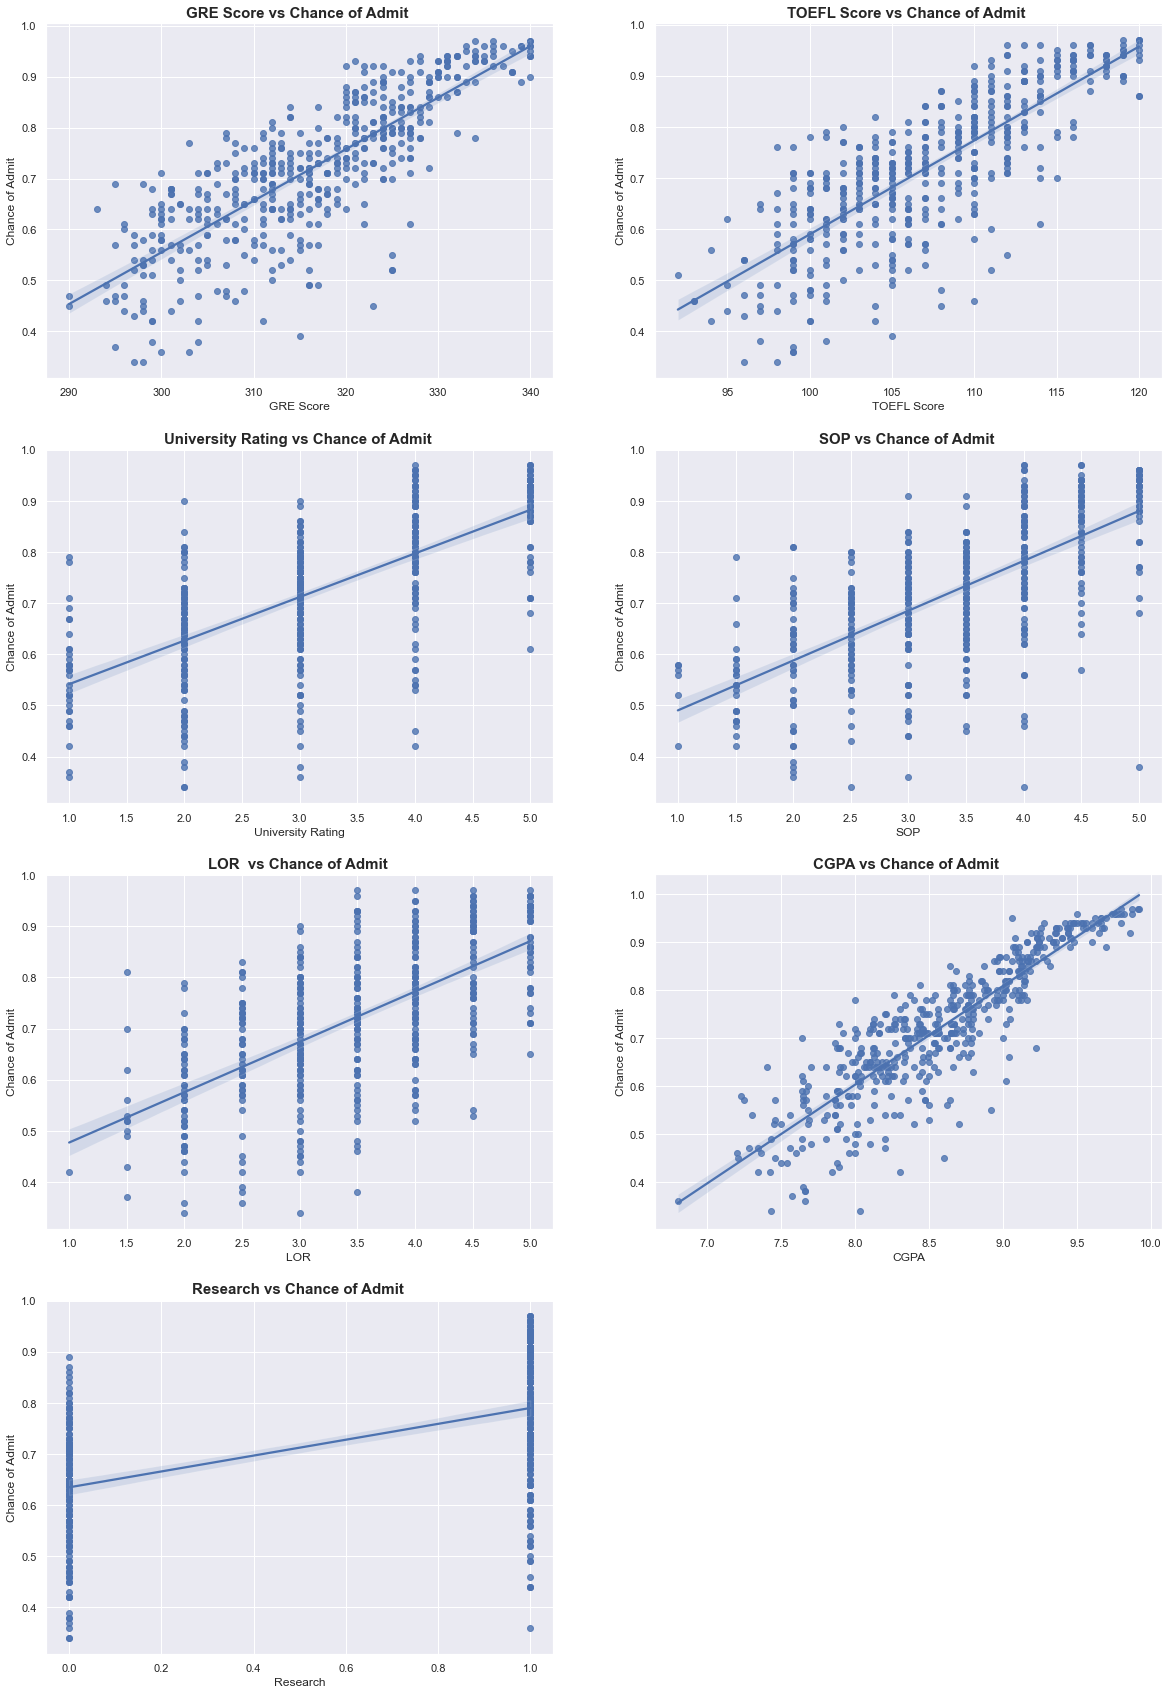

In [59]:
plt.figure(figsize=(20,30))
for feature in enumerate([feature for feature in Numerical_features if feature not in ['Chance of Admit ']]):
    plt.subplot(4,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.regplot(data=dataset1,y='Chance of Admit ',x=feature[1])
    plt.xlabel(feature[1])
    plt.ylabel('Chance of Admit')
    plt.title('{} vs Chance of Admit '.format(feature[1]),fontsize=15,fontweight='bold')

In [60]:
dataset1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [63]:
corr=round(dataset1.corr(),2)
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
TOEFL Score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
University Rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
LOR,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
Research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


<AxesSubplot:>

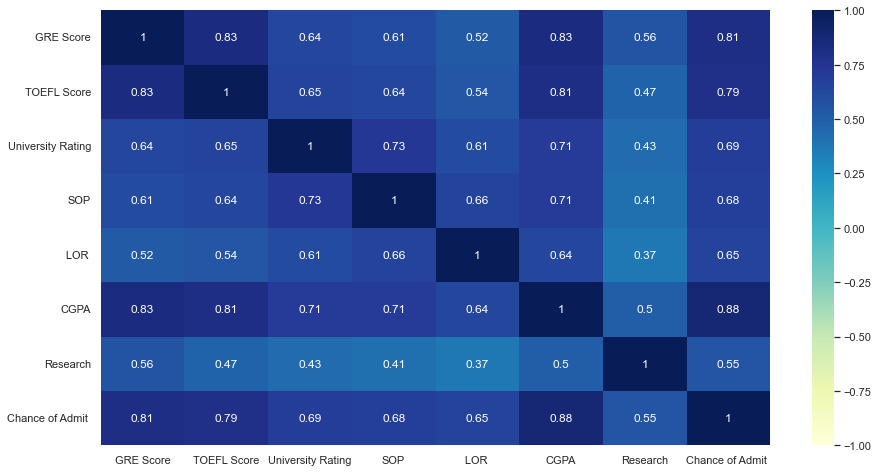

In [75]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

# <span style='color:red'> 1.3 Splitting data into independent and dependent features </span>

In [78]:
X1=dataset1.iloc[:,:-1]
y1=dataset1.iloc[:,-1]
X1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [79]:
y1.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [80]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.25,random_state=10)

In [81]:
X_train1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
324,315,104,3,3.0,2.5,8.33,0
252,318,100,2,2.5,3.5,8.54,1
441,332,112,1,1.5,3.0,8.66,1
427,310,101,3,3.5,5.0,8.65,1
70,332,118,5,5.0,5.0,9.64,1


In [82]:
y_train1.head()

324    0.67
252    0.71
441    0.79
427    0.71
70     0.94
Name: Chance of Admit , dtype: float64

In [83]:
X_test1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
151,332,116,5,5.0,5.0,9.28,1
424,325,114,5,4.0,5.0,9.46,1
154,326,108,3,3.0,3.5,8.89,0
190,324,111,5,4.5,4.0,9.16,1
131,303,105,5,5.0,4.5,8.65,0


In [85]:
y_test1.head()

151    0.94
424    0.91
154    0.80
190    0.90
131    0.77
Name: Chance of Admit , dtype: float64

In [86]:
X_train1.shape,y_train1.shape

((375, 7), (375,))

In [87]:
X_test1.shape,y_test1.shape

((125, 7), (125,))

# <span style='color:red'> 3.4 Transforming data </span>

In [88]:
scaler=StandardScaler()
scaler

StandardScaler()

In [89]:
X_train1=scaler.fit_transform(X_train1)
X_train1

array([[-0.10006876, -0.50453716, -0.0560763 , ..., -1.00222248,
        -0.36783128, -1.13427746],
       [ 0.16173904, -1.16205736, -0.93226844, ...,  0.07005549,
        -0.0297116 ,  0.8816185 ],
       [ 1.38350874,  0.81050323, -1.80846058, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       ...,
       [ 0.07446977, -0.17577707, -0.0560763 , ..., -0.46608349,
        -1.07627251,  0.8816185 ],
       [-1.40910772, -1.16205736, -0.0560763 , ..., -0.46608349,
         0.16349965,  0.8816185 ],
       [-0.27460729, -0.83329726, -0.0560763 , ..., -1.00222248,
         0.19570152, -1.13427746]])

In [90]:
X_test1=scaler.transform(X_test1)
X_test1

array([[ 1.38350874,  1.46802342,  1.69630798,  1.66146257,  1.67847246,
         1.16175776,  0.8816185 ],
       [ 0.77262389,  1.13926332,  1.69630798,  0.66378689,  1.67847246,
         1.45157463,  0.8816185 ],
       [ 0.85989315,  0.15298303, -0.0560763 , -0.3338888 ,  0.07005549,
         0.53382121, -1.13427746],
       [ 0.68535462,  0.64612318,  1.69630798,  1.16262473,  0.60619448,
         0.96854651,  0.8816185 ],
       [-1.14729993, -0.34015711,  1.69630798,  1.66146257,  1.14233347,
         0.14739871, -1.13427746],
       [ 0.33627757, -0.50453716, -0.0560763 , -0.3338888 ,  0.07005549,
         0.29230715,  0.8816185 ],
       [-0.36187655, -0.34015711, -0.93226844, -1.33156448, -1.00222248,
        -0.17462003, -1.13427746],
       [ 1.38350874,  0.15298303,  1.69630798,  1.16262473,  0.60619448,
         0.74313339,  0.8816185 ],
       [-0.62368434, -0.50453716, -0.93226844, -1.33156448, -1.00222248,
        -0.48053784, -1.13427746],
       [-0.36187655, -0.1757

# <span style='color:red'> 1.5 Building SVR Model, training and performance of Model </span>

In [91]:
svr=SVR()
svr

SVR()

In [92]:
svr.fit(X_train1,y_train1)

SVR()

In [93]:
svr_pred=svr.predict(X_test1)
svr_pred

array([0.86448478, 0.86417389, 0.64993814, 0.85127578, 0.70546036,
       0.7574019 , 0.64562856, 0.8374946 , 0.60540491, 0.7499413 ,
       0.87245167, 0.80905978, 0.8501926 , 0.67828992, 0.79563367,
       0.73813638, 0.70599962, 0.74942901, 0.74397623, 0.62461368,
       0.74524207, 0.62023823, 0.59939887, 0.86498548, 0.47403454,
       0.86577212, 0.73739421, 0.5349166 , 0.66114659, 0.6681512 ,
       0.88063063, 0.75792351, 0.59757618, 0.659533  , 0.72195655,
       0.86222102, 0.81603033, 0.66700444, 0.66986721, 0.70308992,
       0.86541166, 0.59529725, 0.69816638, 0.87297663, 0.85464852,
       0.50589332, 0.56266899, 0.65426092, 0.77984391, 0.72964663,
       0.79144637, 0.68053493, 0.54289505, 0.60234504, 0.65093636,
       0.79311027, 0.83658814, 0.61545878, 0.68815676, 0.86796428,
       0.61411511, 0.82414663, 0.73731365, 0.50901921, 0.83202811,
       0.5044696 , 0.70643466, 0.71803499, 0.52797734, 0.69684074,
       0.89743609, 0.55063192, 0.57081914, 0.73056104, 0.69386

In [94]:
svr_r2_score=r2_score(y_test1,svr_pred)
print('our support vector regressor model is {} % accuracy'.format(round(svr_r2_score*100,3)))

our support vector regressor model is 75.701 % accuracy


In [95]:
adjusted_r2_score= 1-((1-svr_r2_score)*(len(y_test1-1))/(len(y_test1)-X_test1.shape[1]-1))
print('adjusted r square accuracy is {} %'.format(round(adjusted_r2_score*100,3)))

adjusted r square accuracy is 74.039 %
